# Problem Description

You have information from Fisheries and Oceans Canada on the salmon run in a particular tributary of the Fraser River in the following form:

| Year | Average Flow Rate (Fraser) | Average Flow Rate (tributary mouth) | Blocks | Salmon Return | Tagging  |
|------|----------------------------|-------------------------------------|--------|---------------|----------|
| 1908 |                       3.22 |                              &nbsp; |      4 |           4.2 | Physical |
| 1909 |                       4.89 |                                1.72 |      4 |           4.9 | Physical |
| 1910 |                       3.70 |                                0.25 |      5 |           3.2 | Chemical |
| 1911 |                       3.48 |                                0.55 |      5 |           3.4 | Radio    |

Note that flow rate for the tributary is only available for certain years and blank otherwise. Assume that only the tagging methods shown here are used.

Notes: Flow rates are in 1000 cubic metres/second. Blocks are blockages (dams and other major obstructions) along the tributary. Estimated salmon rates of return are listed in percentages (e.g., 4.2%). Salmon were tagged using the method list in that particular year.

This information is available in `csv` format in the file `fish.csv`.

## Planning

### Step 1a: Identify the information in the file your program will read

The files contain information on the health of the salmon run in one tributary of the Fraser River. Each row is a year along with the average flow (discharge) rate of the Fraser River and its tributary in 1000s of cubic metres per second, the number of major blockages along the tributary, the estimated percent of salmon returning, and the tagging method used in that year. The tributary's flow rate is not always available.

### Step 1b: Write a description of what your program will produce

Here are a few things we might do with this data:

1. Plot tributary flow against the year (only for years for which we have tributary flow information).
2. List the years when the salmon run was above average.
3. Graph tributary flow divided by Fraser flow vs. time
4. Filter the data to the years with radio tagging.


We'll choose to focus on #1.

Normally, we'd only represent the information that we need to solve the current problem. However, for this problem we'll represent *all* the information in the file as data so that we get extra practice with data definitions.

### Step 1c: Write or draw examples of what your program will produce

We'll use the small example above to show what we might produce.

First, we need to filter to just the years with tributary flow information:

| Year | Average Flow Rate (Fraser) | Average Flow Rate (tributary mouth) | Blocks | Salmon Return | Tagging  |
|------|----------------------------|-------------------------------------|--------|---------------|----------|
| 1909 |                       4.89 |                                1.72 |      4 |           4.9 | Physical |
| 1910 |                       3.70 |                                0.25 |      5 |           3.2 | Chemical |
| 1911 |                       3.48 |                                0.55 |      5 |           3.4 | Radio    |

Now, we need to plot tributary flow rate against year, which might look a bit like the following, but with a *way* better line plotted!


      1.8 |
          |   *
      1.6 |   |
          |   |   
      1.4 |    \
          |     \
      1.2 |      \
          |       |                                           
      0.9 |       |
          |        \
      0.6 |         \        *
          |          | /----/       
      0.3 |           *
          |  
          +------------------------------------------------
             1909    1910    1911

## Building the Program

### Step 2a: Design data definitions

Since we decided to store all the information in the file as data in our program, we want to represent all of the pieces of each row. We also need a separate data definition for the tagging method and for the flow rate. 

In [1]:
from cs103 import *
from typing import NamedTuple, List, Optional
from enum import Enum
import csv

##################
# Data Definitions

TaggingMethod = Enum('TaggingMethod', ['Physical', 'Chemical', 'Radio'])
# interp. the tagging method used to identify salmon
# examples are redundant for enumerations

# template based on enumeration (3 cases)
@typecheck
def fn_for_tagging_method(tm: TaggingMethod) -> ...:
    if tm == TaggingMethod.Physical:
        return ...
    elif tm == TaggingMethod.Chemical:
        return ...
    elif tm == TaggingMethod.Radio:
        return ...
    
FlowRate = Optional[float]  # in range [0,...]
# interp. a flow rate for a river in 1000s of cubic meters per second or None if the data is not available
FR0 = None
FR1 = 22.8

# template based on Optional
@typecheck
def fn_for_flow_rate(f: FlowRate) -> ...:
    if f is None:
        return ...
    else:
        return ...(f)

Year = NamedTuple('Year', [('year', int),
                           ('fraser', float),        # in range[0,...]  
                           ('tributary', FlowRate),
                           ('blocks', int),          # in range[0,...]
                           ('salmon', float),        # in range[0,100]     
                           ('tag', TaggingMethod)])
# interp. information on the salmon run for a particular year, with the
# year, the flow rate in 1000s of cubic meters/second for the Fraser
# and for its tributary (where the latter may be missing), the number
# of blockages on the tributary, the return rate of salmon as a percentage,
# and the tagging method used for the salmon that year.
Y1978 = Year(1978,3.22,None,4,4.2,TaggingMethod.Physical)
Y1979 = Year(1979,4.89,1.72,4,4.9,TaggingMethod.Physical)
Y1980 = Year(1980,3.70,0.25,5,3.2,TaggingMethod.Chemical)
Y1981 = Year(1981,3.48,0.55,5,3.4,TaggingMethod.Radio)

# template based on compound and the reference rule (twice)
@typecheck
def fn_for_year(y: Year) -> ...:
    return ...(y.year,
               y.fraser,
               fn_for_flow_rate(y.tributary),
               y.blocks,
               y.salmon,
               fn_for_tagging_method(y.tag))

# List[Year]
# interp. a list of salmon run data over a number of years
LOY0 = []
LOY1 = [Y1978, Y1979, Y1980, Y1981]

# template based on arbitrary-sized and the reference rule
@typecheck
def fn_for_loy(loy: List[Year]) -> ...:
    # description of the acc
    acc = ...      # type: ...
    for y in loc:
        acc = ...(fn_for_year(y), acc)
    
    return ...(acc)

### Step 2b: Design a function to read the information and store it as data in your program

In [2]:
@typecheck
def read(filename: str) -> List[Year]:
    """    
    reads information from the specified file and returns a list of salmon run data
    """
    # return []  #stub
    # Template from HtDAP
    # loy contains the result so far
    loy = [] # type: List[Year]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        
        # skip header line
        next(reader) 

        for row in reader:
            y = Year(parse_int(row[0]),
                     parse_float(row[1]),
                     parse_float(row[2]),
                     parse_int(row[3]),
                     parse_float(row[4]),
                     parse_tagging_method(row[5]))
            loy.append(y)
    
    return loy

@typecheck
def parse_tagging_method(input: str) -> TaggingMethod:
    """
    convert input (which must be one of "Physical", "Chemical", or "Radio") into
    the corresponding TaggingMethod.
    """
    #return TaggingMethod.Physical  #stub
    #template from atomic non-distinct (with guidance from TaggingMethod template)
    if input == "Physical":
        return TaggingMethod.Physical
    elif input == "Chemical":
        return TaggingMethod.Chemical
    elif input == "Radio":
        return TaggingMethod.Radio


start_testing()

expect(read("fish-test1.csv"), [Year(2000,1.0,2.0,0,100,TaggingMethod.Physical)])
expect(read("fish.csv"), LOY1)

expect(parse_tagging_method("Physical"), TaggingMethod.Physical)
expect(parse_tagging_method("Chemical"), TaggingMethod.Chemical)
expect(parse_tagging_method("Radio"), TaggingMethod.Radio)

summary()


5 of 5 tests passed


### Step 2c: Design functions to analyze the data

Our main analysis function will first filter out the years with no tributary information and then plot the tributary rate vs. year for what remains. This leads to the primary analysis function being a composition of some natural helper functions.

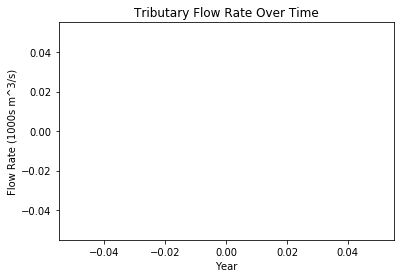

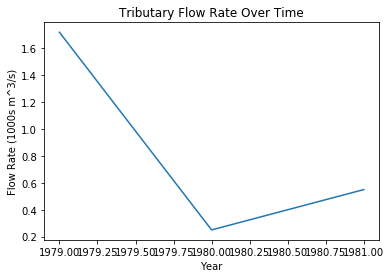

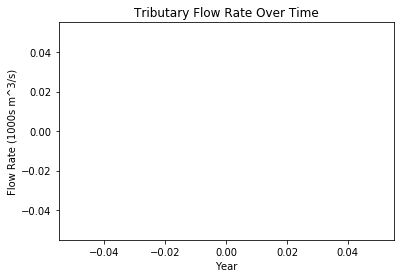

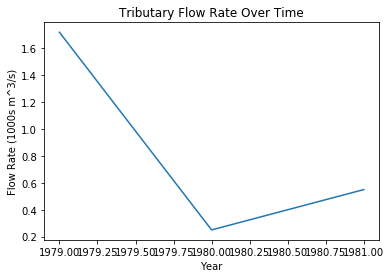

14 of 14 tests passed


In [3]:
import matplotlib.pyplot as pyplot

@typecheck
def plot_selected_years_trib_vs_year(fish_data: List[Year]) -> None:
    """
    Plots the tributary flow rate vs. year for years with tributary flow rate data.
    
    Draws the plot and returns None.
    """
    #return None  #stub
    # Template from composition
    # Plan:
    # 1) filter to only the years where we have flow data
    # 2a) extract from those years the tributary flow rates and
    # 2b)                          the year numbers 
    # 3) plot the flow rates vs. the years
    filtered_data = filter_trib_present(fish_data)
    plot_trib_vs_year(get_trib_rates(filtered_data), get_years(filtered_data))

@typecheck
def plot_trib_vs_year(flow_rates: List[float], years: List[int]) -> None:
    """
    Plots the given flow rates againts the given years. The two lists must be of 
    the same (non-zero) length.
    
    Draws the plot and returns None.
    """
    #return None  #stub
    # Template from visualization
    
    pyplot.title('Tributary Flow Rate Over Time')
    pyplot.xlabel('Year')
    pyplot.ylabel('Flow Rate (1000s m^3/s)')
    pyplot.plot(years, flow_rates)
    pyplot.show()

    

@typecheck
def filter_trib_present(fish_data: List[Year]) -> List[Year]:
    """
    return only the data for years when tributary flow rate information was available
    """
    #return fish_data  #stub
    #template from List[Year]
    
    # acc is the list of years seen so far that have tributary flow data
    acc = []    # type: List[Year]
    for y in fish_data:
        if year_has_flow_data(y):
            acc.append(y)
    return acc

@typecheck
def get_trib_rates(fish_data: List[Year]) -> List[FlowRate]:
    """
    return the tributary flow rates from the given data
    """
    #return []  #stub
    #template from List[Year]
    
    # rates is the list of tributary rates of years seen so far
    rates = []   # type: List[FlowRate]
    for y in fish_data:
        rates.append(y.tributary)
    return rates

@typecheck
def get_years(fish_data: List[Year]) -> List[int]:
    """
    return the year numbers from the given data
    """
    #return []  #stub
    #template from List[Year]
    
    # years is the list of years seen so far
    years = []   # type: List[int]
    for y in fish_data:
        years.append(y.year)
    return years

@typecheck
def year_has_flow_data(y: Year) -> bool:
    """
    return true when y has tributary flow data
    """
    #return True  #stub
    #template from Year
    return has_flow_data(y.tributary)

@typecheck
def has_flow_data(f: FlowRate) -> bool:
    """
    return true when f is non-None
    """
    #return True  #stub
    #template from FlowRate
    
    # Note that while
    #    return f is not None
    # would run correctly, we want to see the form
    # below because it shows that we're using the 
    # FlowRate template:
    if f is None:
        return False
    else:
        return True


# Begin testing
start_testing()

# Should produce an empty graph with x-axis: "Year", y-axis "Flow Rate (1000s m^3/s)",
# and title "Tributary Flow Rate Over Time":
expect(plot_selected_years_trib_vs_year([]), None)

# See the markdown cell below for what this graph should look like:
expect(plot_selected_years_trib_vs_year(LOY1), None)


# Should produce an empty graph with x-axis: "Year", y-axis "Flow Rate (1000s m^3/s)",
# and title "Tributary Flow Rate Over Time":
expect(plot_trib_vs_year([], []), None)

# See the markdown cell below for what this graph should look like:
expect(plot_trib_vs_year([1.72, 0.25, 0.55],
                         [1979, 1980, 1981]), None)


expect(filter_trib_present(LOY0), [])
expect(filter_trib_present(LOY1), [Y1979, Y1980, Y1981])

expect(get_trib_rates(LOY0), [])
expect(get_trib_rates(LOY1[1:]), [1.72, 0.25, 0.55]) # I'm manually "filtering out" LOY1[0], since it has None for flow rate.

expect(get_years(LOY0), [])
expect(get_years(LOY1), [1978, 1979, 1980, 1981])

expect(year_has_flow_data(Y1978), False)
expect(year_has_flow_data(Y1979), True)

expect(has_flow_data(None), False)
expect(has_flow_data(22.5), True)

# show testing summary
summary()

Our second test for `plot_selected_years_trib_vs_year` and `plot_trib_vs_year` above and our first test for `main` below should look roughly like this:


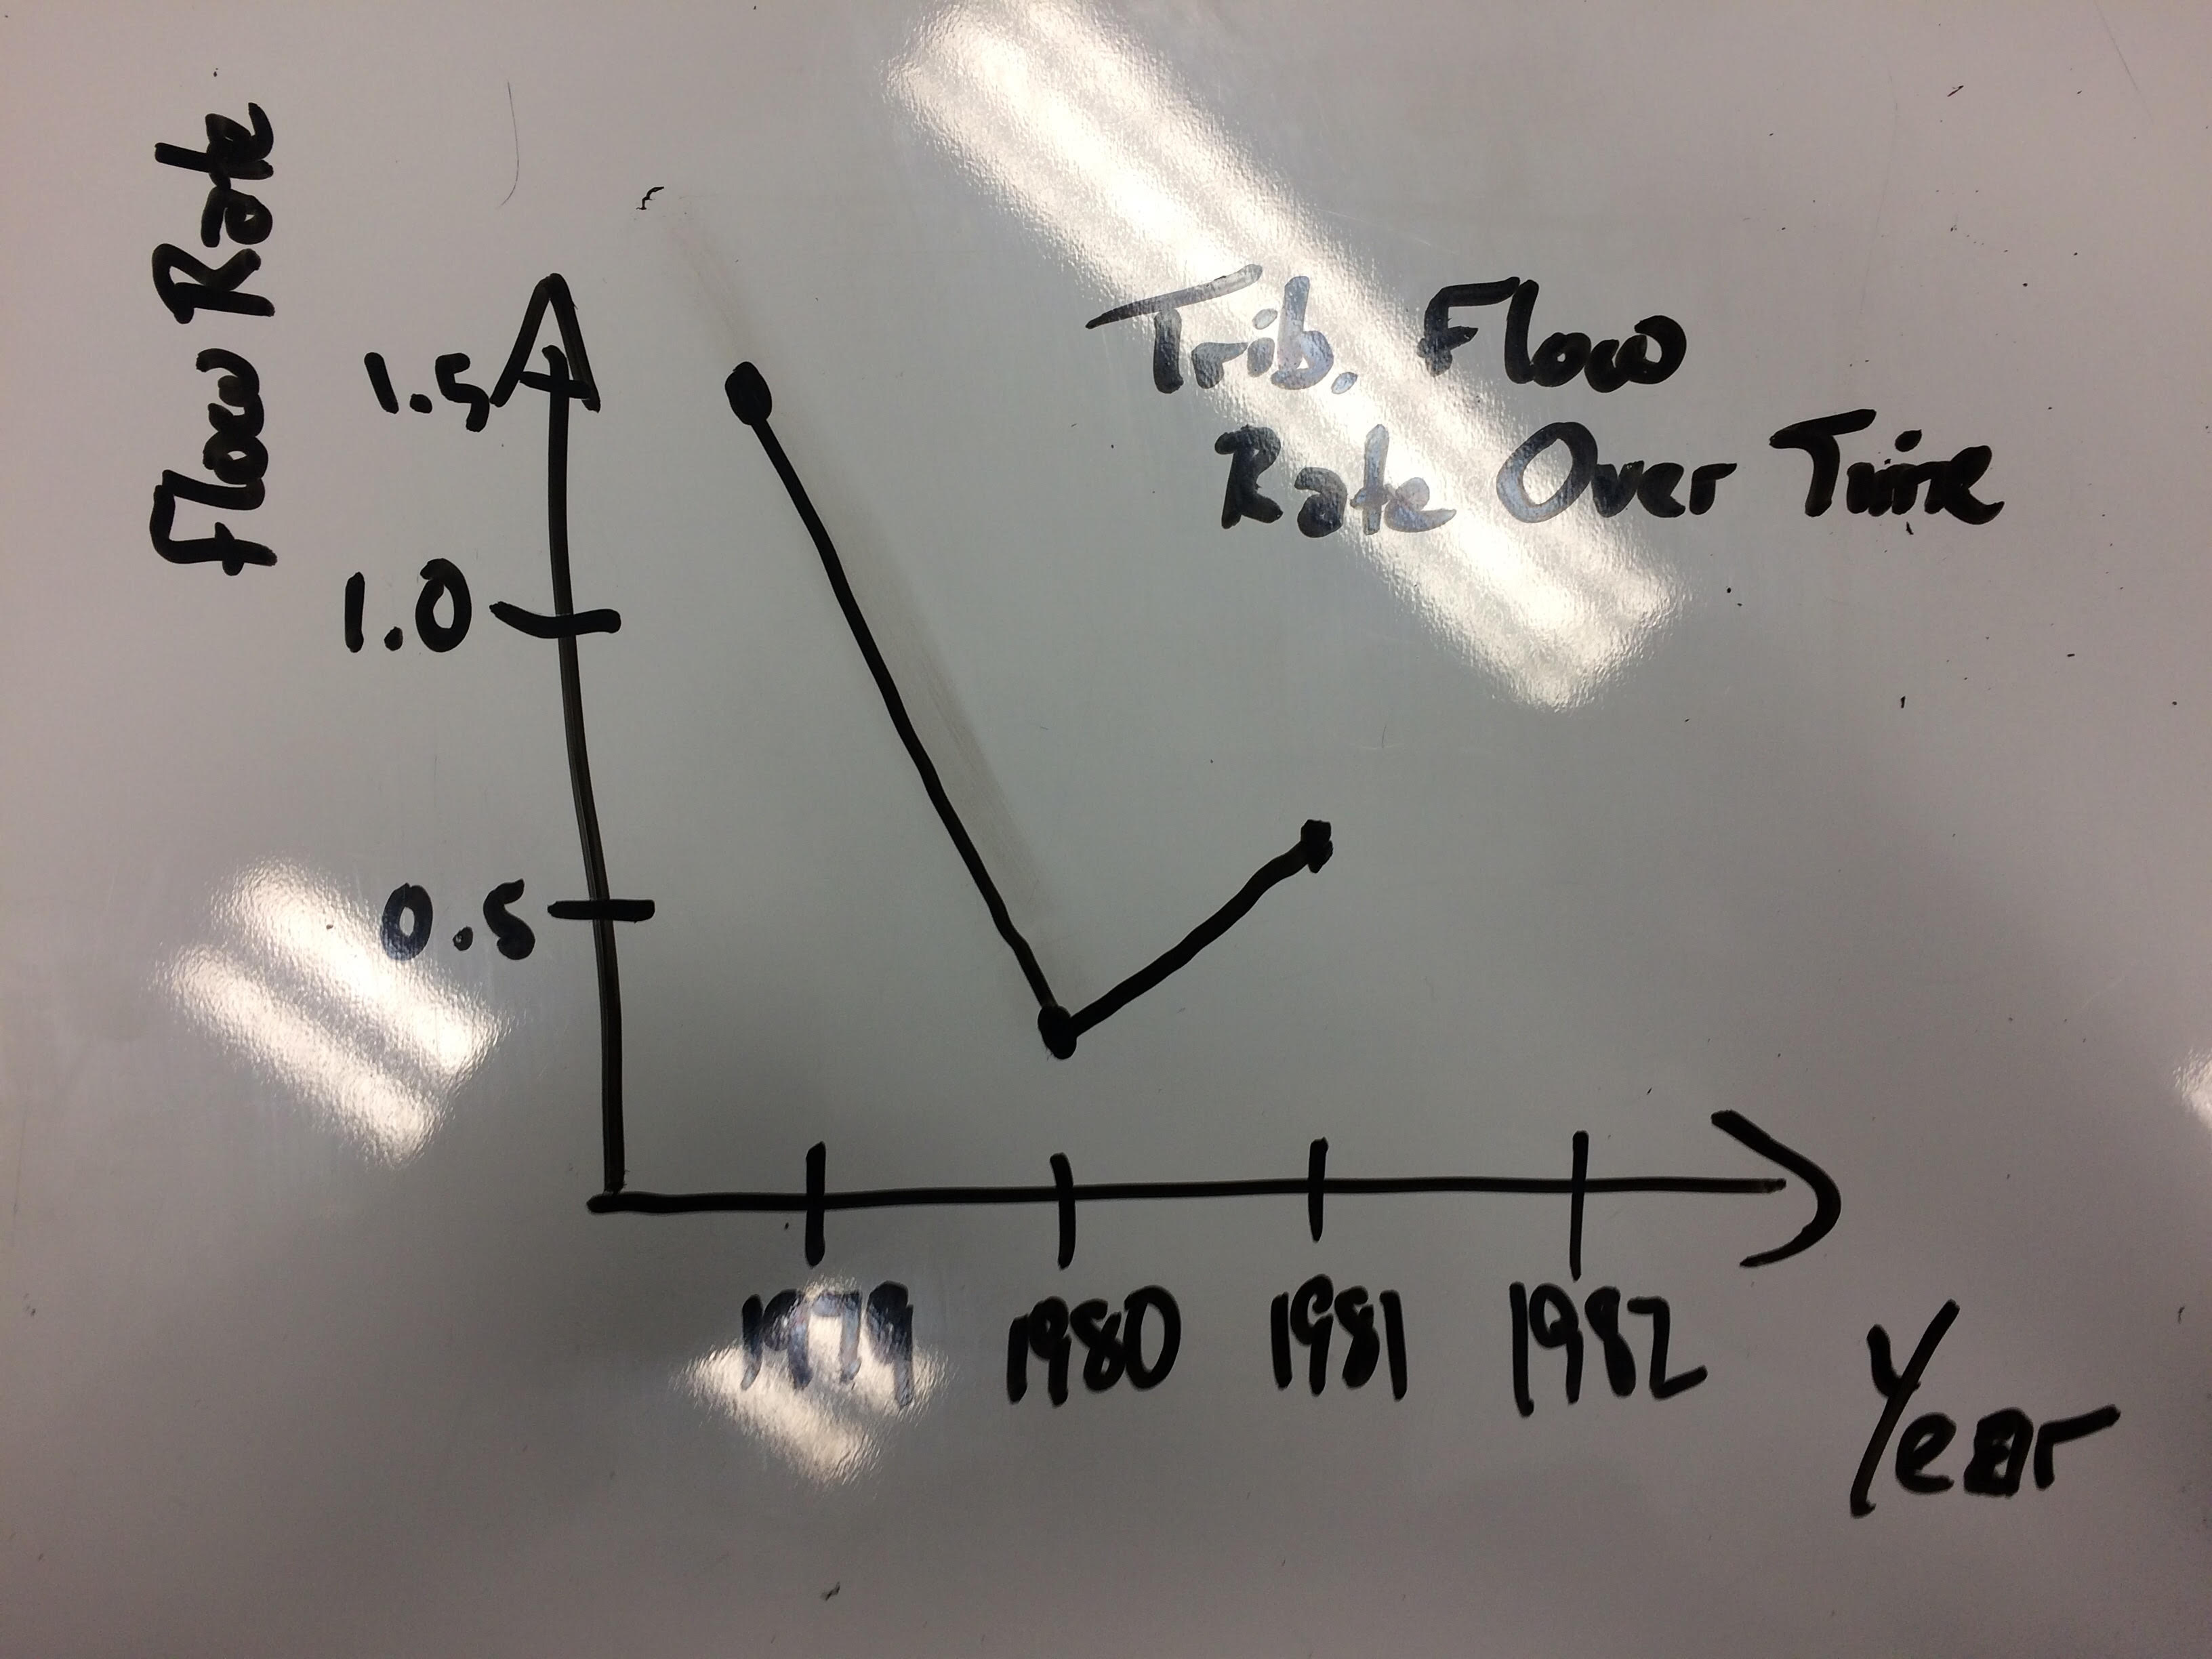

We added that using the "Insert Image" option in the "Edit" menu (which works in Markdown cells).

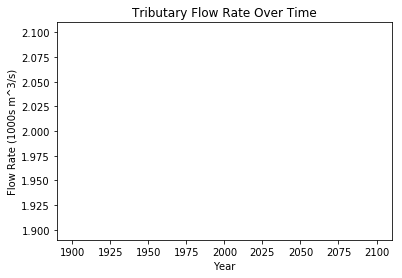

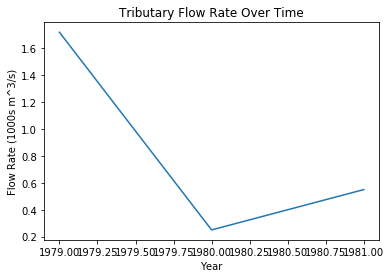

2 of 2 tests passed


In [4]:
# Because our goal is to create a plot, we return nothing (None).
@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data,
    and plots tributary flow rate in years where it's present
    and tagging was non-physical.
    
    Does not return anything!
    """
    # Template from HtDAP, based on composition
    plot_selected_years_trib_vs_year(read(filename))

start_testing()

# Since this has only one point, we won't see anything on the graph; so,
# Should produce x-axis: "Year", y-axis "Flow Rate (1000s m^3/s)",
# and title "Tributary Flow Rate Over Time":
expect(main('fish-test1.csv'), None)

# Should look roughly like the sketch in the markdown cell above.
expect(main('fish.csv'), None)
summary()